# Multiple Random Gabor experiment

> In this quick experiment we will be training an MNIST classifier using multiple `RandomGabor` layers.

In [1]:
#| hide
%load_ext autoreload
%autoreload 2

## Library importing

In [2]:
#| hide
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from flayers.layers import RandomGabor

## Data loading

> We will be using MNIST for a simple and quick test.

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = repeat(X_train, "b h w ->  b h w c", c=1)/255.0
X_test = repeat(X_test, "b h w ->  b h w c", c=1)/255.0

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

## Definition of simple model

In [5]:
model = tf.keras.Sequential([
    RandomGabor(n_gabors=4, size=20, input_shape=(28,28,1)),
    layers.MaxPool2D(2),
    RandomGabor(n_gabors=4, size=20),
    layers.MaxPool2D(2),
    RandomGabor(n_gabors=4, size=20),
    layers.MaxPool2D(2),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

2022-09-08 10:28:47.259611: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5435 MB memory:  -> device: 0, name: NVIDIA GeForce GTX TITAN Black, pci bus id: 0000:83:00.0, compute capability: 3.5


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_gabor (RandomGabor)   (None, 28, 28, 4)         26        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
random_gabor_1 (RandomGabor) (None, 14, 14, 4)         26        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
random_gabor_2 (RandomGabor) (None, 7, 7, 4)           26        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 4)           0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 4)                 0

We can show the initial Gabor filters:

2022-09-08 10:28:50.838435: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-08 10:28:51.081995: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x5626d6503e40


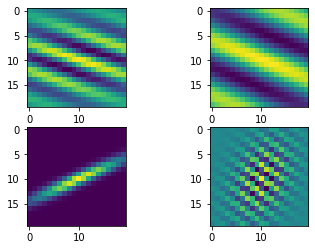

In [6]:
model.layers[0].show_filters()

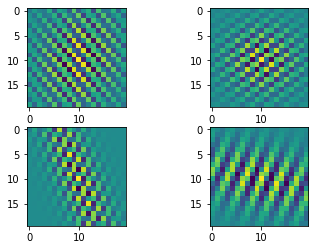

In [7]:
model.layers[2].show_filters()

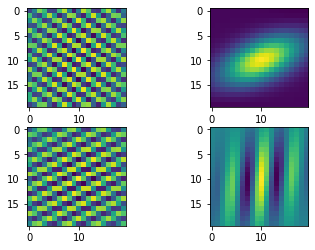

In [8]:
model.layers[4].show_filters()

In [9]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_split=0.2)

Epoch 1/100


2022-09-08 10:29:07.139561: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2022-09-08 10:29:07.594658: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


375/375 [==============================] - 42s 79ms/step - loss: 653.6666 - accuracy: 0.1011 - val_loss: 59.0548 - val_accuracy: 0.0952
Epoch 2/100
375/375 [==============================] - 27s 73ms/step - loss: 13.6545 - accuracy: 0.1205 - val_loss: 5.5856 - val_accuracy: 0.1410
Epoch 3/100
375/375 [==============================] - 28s 73ms/step - loss: 4.9277 - accuracy: 0.1479 - val_loss: 4.3816 - val_accuracy: 0.1614
Epoch 4/100
375/375 [==============================] - 28s 74ms/step - loss: 4.1624 - accuracy: 0.1656 - val_loss: 3.8244 - val_accuracy: 0.1743
Epoch 5/100
375/375 [==============================] - 28s 73ms/step - loss: 3.7332 - accuracy: 0.1778 - val_loss: 3.4878 - val_accuracy: 0.1872
Epoch 6/100
375/375 [==============================] - 28s 76ms/step - loss: 3.4179 - accuracy: 0.1899 - val_loss: 3.2097 - val_accuracy: 0.2020
Epoch 7/100
375/375 [==============================] - 29s 77ms/step - loss: 3.1593 - accuracy: 0.1995 - val_loss: 2.9968 - val_accuracy: 

Showing the training dynamics:

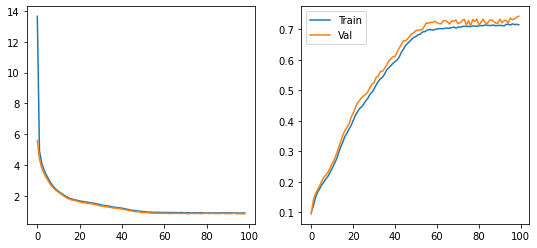

In [15]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
axes[0].plot(history.history['loss'][1:], label="Train")
axes[0].plot(history.history['val_loss'][1:], label="Val")
axes[1].plot(history.history['accuracy'], label="Train")
axes[1].plot(history.history['val_accuracy'], label="Val")
plt.legend()
plt.show()

Calculate the metrics in the test set:

In [14]:
model.evaluate(X_test, Y_test, batch_size=128)

79/79 [==============================] - 2s 29ms/step - loss: 0.8396 - accuracy: 0.7444


[0.8396355509757996, 0.7444000244140625]

We can visualize the gabor filters after the training process:

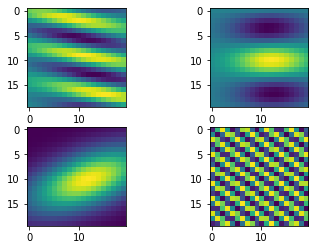

In [11]:
model.layers[0].show_filters()

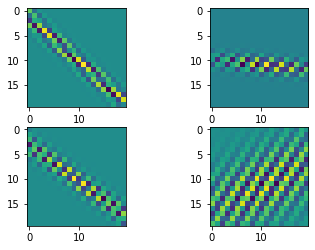

In [12]:
model.layers[2].show_filters()

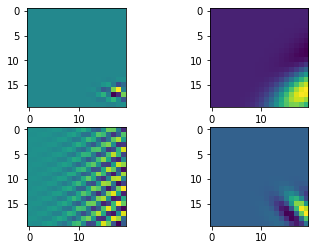

In [13]:
model.layers[4].show_filters()